In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
#Make Regression
print("Make Regression")
from sklearn.datasets import make_regression

np.random.seed(12)
x, y, coef = make_regression(n_samples = 50, n_features = 1, bias = 100, coef = True)
# n_features : 독립변수. bias : 절편 (디폴트=0.0), coef : 기울기
print(x[[range(1,5)]])
print(y[[range(1,5)]])
print(coef) 
# 표본데이터(x) 50개와 그에따른 y값 50개 반환되었다.
y_pred  = 100 + 89.47430739278907 * -1.70073563
# y_pred : 예측에 의한 y값
#bias: 89.47430739278907
#weight:-1.70073563
print(y) 
# 수식에 의해 예측한 값 = -52.17214255248879
# 실제값 = -52.17214291
# make regression을 이용해 x를 입력하면 수식에 의해 예측된 y값을 도출해낼 수 있다.
# 실제로 운영하기에는 현실적으로 다소 무리가 있다.
# 있다는 것만 알고 넘어가자.

Make Regression
[[-0.67794537]
 [ 0.31866529]
 [ 0.13884618]
 [ 0.53513589]]
[ 39.34130801 128.51235594 112.42316554 147.88091341]
89.47430739278907
[ -52.17214291   39.34130801  128.51235594  112.42316554  147.88091341
   96.49178624  103.16885304   36.12820309   89.71761789  190.59412103
  300.58509445  100.45874176    7.88349776   42.07157936  142.32007968
   -8.72638684   77.28210847   65.60976235  147.18272498  142.27276227
   18.23219105  144.90467678   39.0298914   -98.0364801    89.07073235
   48.8313381   220.10640661   -3.28558253   47.63352619 -181.61291334
  119.23482409  -50.47399897   27.79585534  208.24569942  198.05991459
   46.51020834   10.77587732   52.72138937   89.24271248  106.55417864
   90.52804266  167.38693344  121.69210605  -98.50187763  -59.98849467
  356.95405132  219.52258382  -37.31812896  157.33165682   69.79389882]


C:\Tensor\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
C:\Tensor\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':


In [3]:
#LinearRegression
x1 = x
y1 = y
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, n_jobs=None)
#n_jobs: cpu에 따라 병렬로 처리할 수 있게 해주는 Option

print(model)
fit_model = model.fit(x1, y1)

print("기울기: ", fit_model.coef_)
print("절편: ", fit_model.intercept_)
y_new = fit_model.predict(x1)
print(y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
기울기:  [89.47430739]
절편:  100.0
[ -52.17214291   39.34130801  128.51235594  112.42316554  147.88091341
   96.49178624  103.16885304   36.12820309   89.71761789  190.59412103
  300.58509445  100.45874176    7.88349776   42.07157936  142.32007968
   -8.72638684   77.28210847   65.60976235  147.18272498  142.27276227
   18.23219105  144.90467678   39.0298914   -98.0364801    89.07073235
   48.8313381   220.10640661   -3.28558253   47.63352619 -181.61291334
  119.23482409  -50.47399897   27.79585534  208.24569942  198.05991459
   46.51020834   10.77587732   52.72138937   89.24271248  106.55417864
   90.52804266  167.38693344  121.69210605  -98.50187763  -59.98849467
  356.95405132  219.52258382  -37.31812896  157.33165682   69.79389882]


In [4]:
#Linear Regression을 활용하여 새로운 값 예측
x_new, _, _ = make_regression(n_samples = 5, n_features = 1, bias = 100, coef = True)
print(x_new)
y_pred2 = fit_model.predict(x_new)
print(y_pred2)

[[-0.5314769 ]
 [ 0.86721724]
 [-1.25494726]
 [ 0.93016889]
 [-1.63412849]]
[ 52.44647266 177.59366163 -12.28553693 183.2262176  -46.21251453]


In [5]:
#ols
import statsmodels.formula.api as smf

x1 = x.flatten()
#flatten(): 차원 축소
print(x1.shape)
print(y1.shape)
data = np.array([x1, y1])
df = pd.DataFrame(data.T)
df.columns = ["x1", "y1"]
print(df.head(3))
model = smf.ols(formula = "y1 ~ x1", data = df).fit()
print(model.summary())

(50,)
(50,)
         x1          y1
0 -1.700736  -52.172143
1 -0.677945   39.341308
2  0.318665  128.512356
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.905e+32
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:12:20   Log-Likelihood:                 1460.6
No. Observations:                  50   AIC:                            -2917.
Df Residuals:                      48   BIC:                            -2913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [6]:
print("기울기: ", model.params['x1'])
print("절편: ", model.params['Intercept'])
print("pvalue",model.pvalues)
#pvalue(0) <0.05 이므로 통계적으로 유의하다.
print("설명력",model.rsquared)
#설명력은 100%로 설명력이 높다.

기울기:  89.47430739278903
절편:  99.99999999999999
pvalue Intercept    0.0
x1           0.0
dtype: float64
설명력 1.0


In [7]:
#Iris를 활용한 단순 회귀 분석
#상관관계에 따른 결과 확인
import seaborn as sns
print("\n#1. 단순회귀분석")
iris = sns.load_dataset("iris")
print(iris.head(3))
print('상관계수',iris.corr())
#sepal_length ~ sepal_width 의 상관계수 = -0.117570

result = smf.ols("sepal_length ~ sepal_width", data = iris).fit()
print(result.summary())
print("결정 계수: ", result.rsquared)
#0.013822654141080859 => 설명력이 낮다.
print("p값: ", result.pvalues)
print("실제값: ", iris.sepal_length[0], "예측값: ", result.predict()[0])


#1. 단순회귀분석
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
상관계수               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000
                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Tue, 30 Jul 2019   Prob (F-statistic):              0.1

In [8]:
result2 = smf.ols("sepal_length ~ petal_length", data = iris).fit()
#sepal_length ~ petal_length 의 상관계수 = 0.871754
print(result2.summary())
print("결정 계수: ", result2.rsquared) 
#75% 이므로 충분히 설명력을 가진다.
print("p값: ", result2.pvalues)
#pvalue(2.426713e-100) < 0.05 이므로 통계적으로 유의하다.
print("실제값: ", iris.sepal_length[0], "예측값: ", result2.predict()[0])

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.04e-47
Time:                        21:12:20   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3066      0.078     54.939   

In [9]:
#Iris를 활용한 다중 회귀 분석
print("\n#2. 다중회귀분석")
# 다중회귀분석 formula = "y ~ x1 + x2 + ..."
result3 = smf.ols(formula = "sepal_length ~ petal_length + petal_width", data = iris).fit()
print(result3.summary())
print("결정 계수: ", result3.rsquared)
print("p값: ", result3.pvalues)
'''
결정 계수:  0.7662612975425306 => 충분한 설명력을 가진다.
p값: 2.092645e-85 < 0.05 => 통계적으로 유의하다.
'''


#2. 다중회귀분석
                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           4.00e-47
Time:                        21:12:20   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1906      0.097  

'\n결정 계수:  0.7662612975425306 => 충분한 설명력을 가진다.\np값: 2.092645e-85 < 0.05 => 통계적으로 유의하다.\n'

In [10]:

column_selected = "+".join(iris.columns.difference(["sepal_length", "sepal_width", "species"]))
print(column_selected)
result4 = smf.ols(formula = "sepal_length ~ " + column_selected, data = iris).fit()
print(result4.summary())
print("결정 계수: ", result4.rsquared)
print("p값: ", result4.pvalues)
'''
결정 계수:  0.7662612975425306 => 충분한 설명력을 가진다.
p값: 2.092645e-85 < 0.05 => 통계적으로 유의하다.
'''

petal_length+petal_width
                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           4.00e-47
Time:                        21:12:20   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1906

'\n결정 계수:  0.7662612975425306 => 충분한 설명력을 가진다.\np값: 2.092645e-85 < 0.05 => 통계적으로 유의하다.\n'

In [11]:
#scipy.stats.linregress
from scipy import stats

score_iq = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/score_iq.csv")
print(score_iq.head(3))

print("\n score_iq.corr(): \n", score_iq.corr())
x = score_iq.iq
y = score_iq.score

model = stats.linregress(x, y)
print("\n model: ", model)
print("기울기: ", model.slope) #0.6514309527270075
print("절편: ", model.intercept) #-2.8564471221974657
print("상관계수: ", model.rvalue) #0.8822203446134699
print("p값: ", model.pvalue) #2.8476895206683644e-50
print("표준오차: ", model.stderr) #0.028577934409305443
'''
상관계수:  0.8822203446134699 => 매우 높은 양의 상관관계를 가지고 있다.
p값:  2.8476895206683644e-50 < 0.05 => 통계적으로 유의하다.
'''
iq = 140
y_pred = model.slope * iq + model.intercept
print("예측 된 y값: ", y_pred) #88.34388625958358

     sid  score   iq  academy  game  tv
0  10001     90  140        2     1   0
1  10002     75  125        1     3   3
2  10003     77  120        1     0   4

 score_iq.corr(): 
               sid     score        iq   academy      game        tv
sid      1.000000 -0.014399 -0.007048 -0.004398  0.018806  0.024565
score   -0.014399  1.000000  0.882220  0.896265 -0.298193 -0.819752
iq      -0.007048  0.882220  1.000000  0.671783 -0.031516 -0.585033
academy -0.004398  0.896265  0.671783  1.000000 -0.351315 -0.948551
game     0.018806 -0.298193 -0.031516 -0.351315  1.000000  0.239217
tv       0.024565 -0.819752 -0.585033 -0.948551  0.239217  1.000000

 model:  LinregressResult(slope=0.6514309527270075, intercept=-2.8564471221974657, rvalue=0.8822203446134699, pvalue=2.8476895206683644e-50, stderr=0.028577934409305443)
기울기:  0.6514309527270075
절편:  -2.8564471221974657
상관계수:  0.8822203446134699
p값:  2.8476895206683644e-50
표준오차:  0.028577934409305443
예측 된 y값:  88.34388625958358


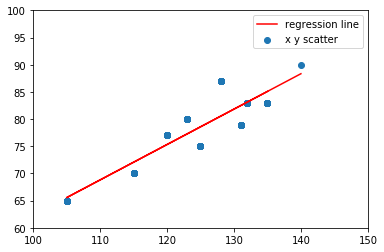

In [12]:
#결과 시각화하여 살펴보기
plt.scatter(x, y)
plt.xlim([100,150])
plt.ylim([60,100])
plt.plot(x,0.6514309527270075*x-2.8564471221974657,'r')
plt.legend(["regression line", "x y scatter"])
plt.show()

In [13]:
#모집단 자료(전체) 이용하기
print("\n <모집단 자료 이용하기>")
product = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/product.csv")
print(product.head(2))
print(product.corr())
model2 = stats.linregress(product["b"], product["c"])

print("model: ", model2)
print("기울기: ", model2.slope)
print("절편: ", model2.intercept)
print("상관계수: ", model2.rvalue)
print("p값: ", model2.pvalue)
print("표준오차: ", model2.stderr)
'''
상관계수:  0.766852699640837 => 매우 높은 양의 상관관계를 가지고 있다.
p값:  0.235344857549548e-52 < 0.05 => 통계적으로 유의하다.
'''


 <모집단 자료 이용하기>
   a  b  c
0  3  4  3
1  3  3  2
          a         b         c
a  1.000000  0.499209  0.467145
b  0.499209  1.000000  0.766853
c  0.467145  0.766853  1.000000
model:  LinregressResult(slope=0.7392761785971821, intercept=0.7788583344701907, rvalue=0.766852699640837, pvalue=2.235344857549548e-52, stderr=0.03822605528717565)
기울기:  0.7392761785971821
절편:  0.7788583344701907
상관계수:  0.766852699640837
p값:  2.235344857549548e-52
표준오차:  0.03822605528717565


'\n상관계수:  0.766852699640837 => 매우 높은 양의 상관관계를 가지고 있다.\np값:  0.235344857549548e-52 < 0.05 => 통계적으로 유의하다.\n'

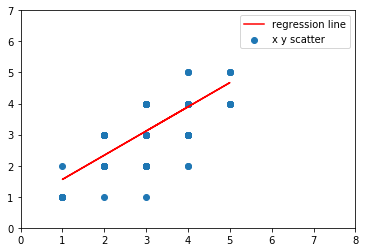

In [14]:
#결과 시각화하여 살펴보기
plt.scatter(product["b"], product["c"])
plt.xlim([0,8])
plt.ylim([0,7])
plt.plot(product["b"],0.7788583344701907*product["b"]+0.7788583344701907,'r')
plt.legend(["regression line", "x y scatter"])
plt.show()

In [15]:
#샘플링 자료 이용하기
print("\n <샘플링 자료 이용하기>")
idx = np.random.randint(1, len(product), 150)
print(len(idx))
dataset = product.loc[idx]
print(dataset[:5])
model3 = stats.linregress(dataset["b"], dataset["c"])
print("model: ", model3)
print("기울기: ", model3.slope)
print("절편: ", model3.intercept)
print("상관계수: ", model3.rvalue)
print("p값: ", model3.pvalue)
print("표준오차: ", model3.stderr)
'''
상관계수:  0.7953597521219435 => 매우 높은 양의 상관관계를 가지고 있다.
p값:  5.424928391628453e-34 < 0.05 => 통계적으로 유의하다.
'''


 <샘플링 자료 이용하기>
150
     a  b  c
77   1  1  1
148  3  3  3
234  3  3  3
159  3  4  4
172  2  2  3
model:  LinregressResult(slope=0.7257880124122156, intercept=0.7924220153519537, rvalue=0.7953597521219435, pvalue=5.424928391628453e-34, stderr=0.045465983691246346)
기울기:  0.7257880124122156
절편:  0.7924220153519537
상관계수:  0.7953597521219435
p값:  5.424928391628453e-34
표준오차:  0.045465983691246346


'\n상관계수:  0.7953597521219435 => 매우 높은 양의 상관관계를 가지고 있다.\np값:  5.424928391628453e-34 < 0.05 => 통계적으로 유의하다.\n'

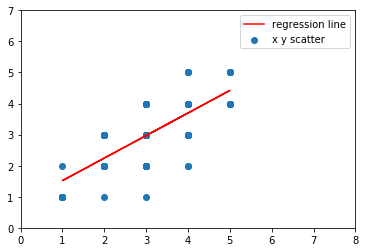

In [16]:
#결과 시각화하여 살펴보기
plt.scatter(product["b"], product["c"])
plt.xlim([0,8])
plt.ylim([0,7])
plt.plot(product["b"],0.7257880124122156*product["b"]+0.7924220153519537,'r')
plt.legend(["regression line", "x y scatter"])
plt.show()